In [2]:
data0 = read.csv("C:\\Users\\pc\\Desktop\\628\\Module2\\BodyFat.csv")
data0 = data0[,-1]
data=data0[-2]
# lm all
data.lm <- lm(BODYFAT~.,data)
summary(data.lm)
# lm bic
data.bic <- step(data.lm, direction = "both", k = log(length(data[,1])))
summary(data.bic)






Call:
lm(formula = BODYFAT ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2573  -2.5919  -0.1031   2.9040   9.2754 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.519e+01  1.611e+01  -0.943   0.3467    
AGE          5.688e-02  3.003e-02   1.894   0.0594 .  
WEIGHT      -8.130e-02  4.989e-02  -1.630   0.1045    
HEIGHT      -5.307e-02  1.034e-01  -0.513   0.6084    
ADIPOSITY    6.101e-02  2.780e-01   0.219   0.8265    
NECK        -4.450e-01  2.184e-01  -2.037   0.0427 *  
CHEST       -3.087e-02  9.779e-02  -0.316   0.7526    
ABDOMEN      8.790e-01  8.545e-02  10.286   <2e-16 ***
HIP         -2.031e-01  1.371e-01  -1.481   0.1398    
THIGH        2.274e-01  1.356e-01   1.677   0.0948 .  
KNEE        -9.927e-04  2.298e-01  -0.004   0.9966    
ANKLE        1.572e-01  2.076e-01   0.757   0.4496    
BICEPS       1.485e-01  1.600e-01   0.928   0.3543    
FOREARM      4.297e-01  1.849e-01   2.324   0.0210 *  
WRIST     

Start:  AIC=765.66
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.00 3784.4 760.13
- ADIPOSITY  1      0.77 3785.1 760.18
- CHEST      1      1.59 3786.0 760.24
- HEIGHT     1      4.20 3788.6 760.41
- ANKLE      1      9.16 3793.5 760.74
- BICEPS     1     13.75 3798.1 761.05
- HIP        1     35.04 3819.4 762.45
- WEIGHT     1     42.41 3826.8 762.94
- THIGH      1     44.92 3829.3 763.11
- AGE        1     57.29 3841.7 763.92
- NECK       1     66.28 3850.6 764.51
<none>                   3784.4 765.66
- FOREARM    1     86.26 3870.6 765.81
- WRIST      1    141.64 3926.0 769.39
- ABDOMEN    1   1689.43 5473.8 853.14

Step:  AIC=760.13
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ADIPOSITY  1      0.81 3785.2 754.66



Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8002 -2.8728 -0.1545  2.8980  8.3845 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -31.29679    6.70886  -4.665 5.06e-06 ***
WEIGHT       -0.12557    0.02292  -5.479 1.05e-07 ***
ABDOMEN       0.92137    0.05192  17.747  < 2e-16 ***
FOREARM       0.44638    0.16822   2.654 0.008480 ** 
WRIST        -1.39177    0.40991  -3.395 0.000799 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.021 on 247 degrees of freedom
Multiple R-squared:  0.7351,	Adjusted R-squared:  0.7308 
F-statistic: 171.4 on 4 and 247 DF,  p-value: < 2.2e-16


1.0000000,0.8879949,0.6303014,0.7297749
0.8879949,1.0000000,0.5033161,0.6198324
0.6303014,0.5033161,1.0000000,0.5855883
0.7297749,0.6198324,0.5855883,1.0000000


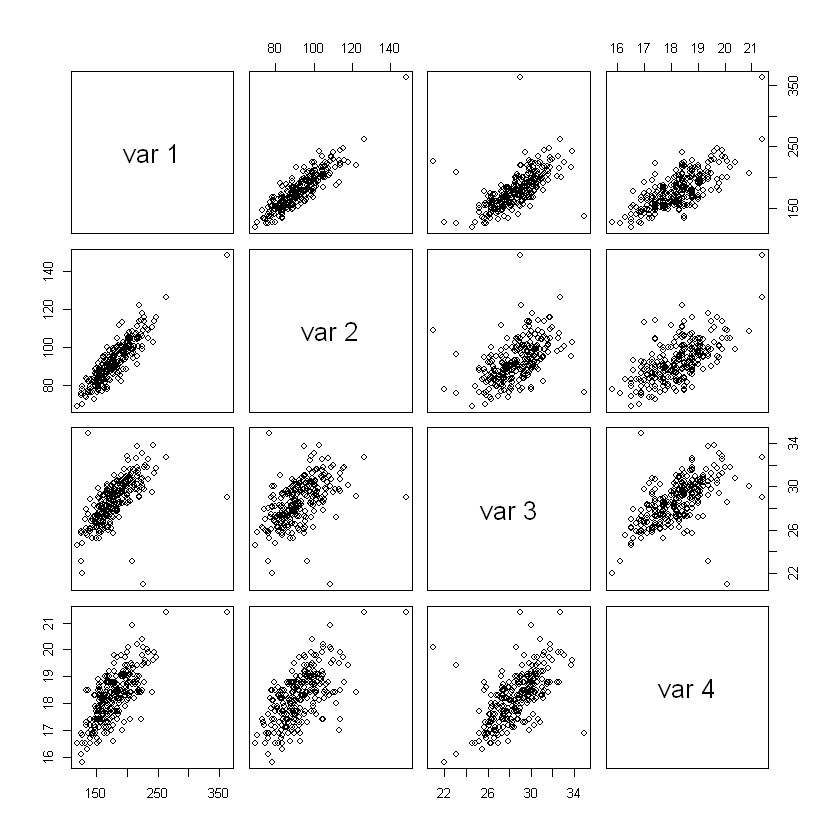

In [3]:
pairs(cbind(data$WEIGHT,data$ABDOMEN,data$FOREARM,data$WRIST))
cor(cbind(data$WEIGHT,data$ABDOMEN,data$FOREARM,data$WRIST))


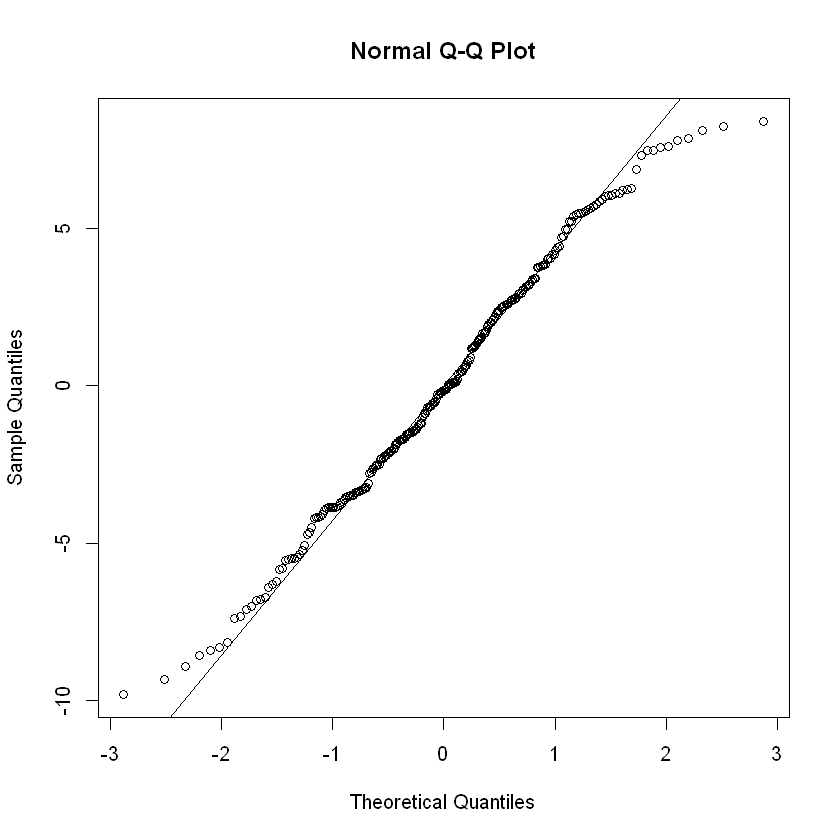

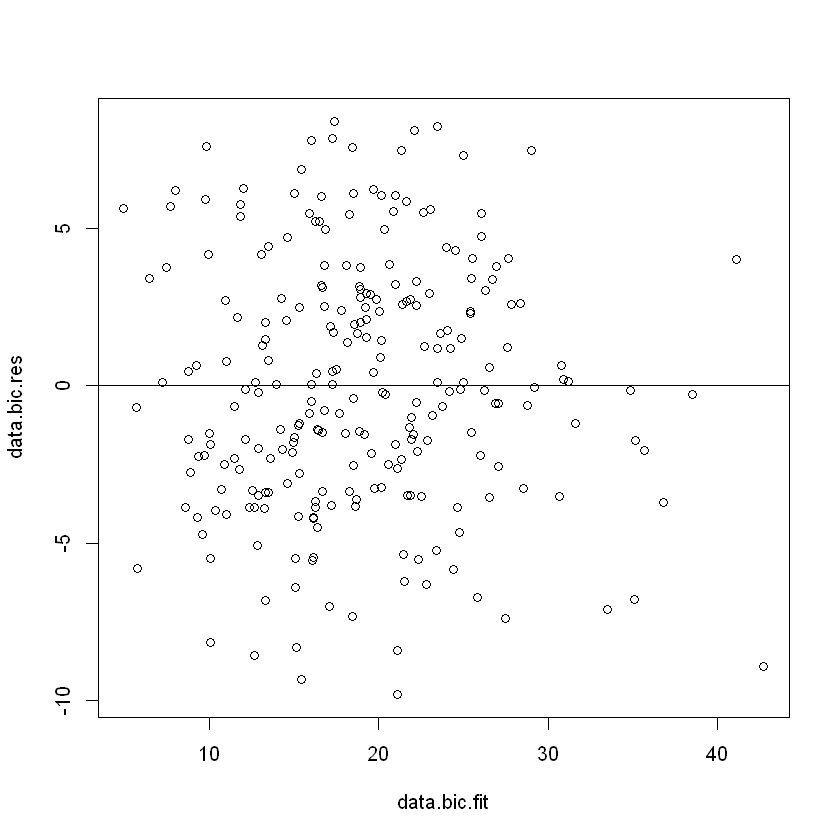

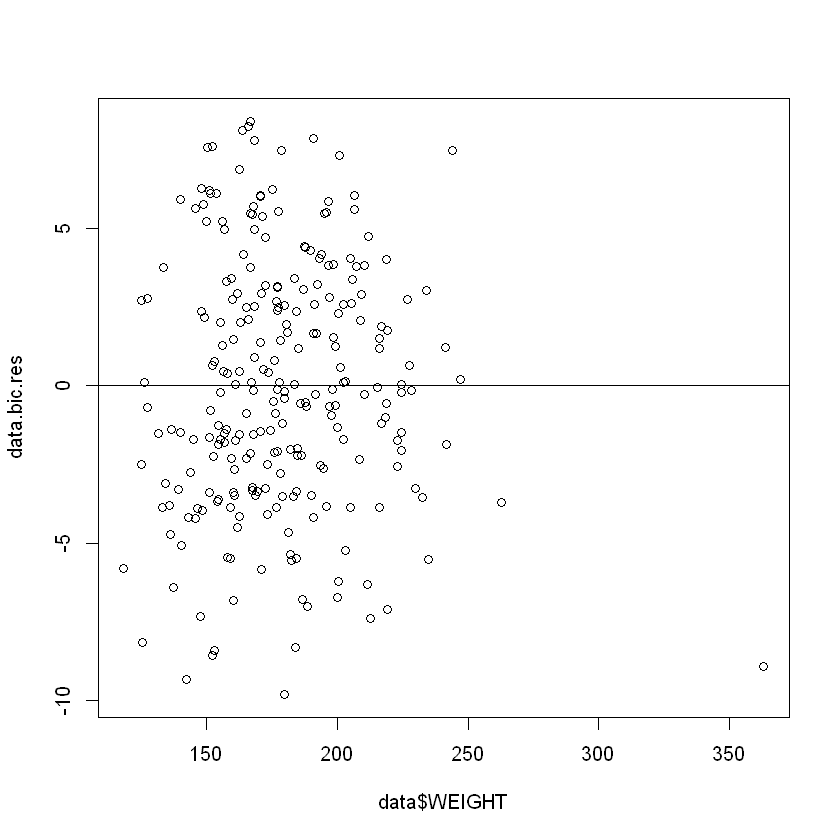

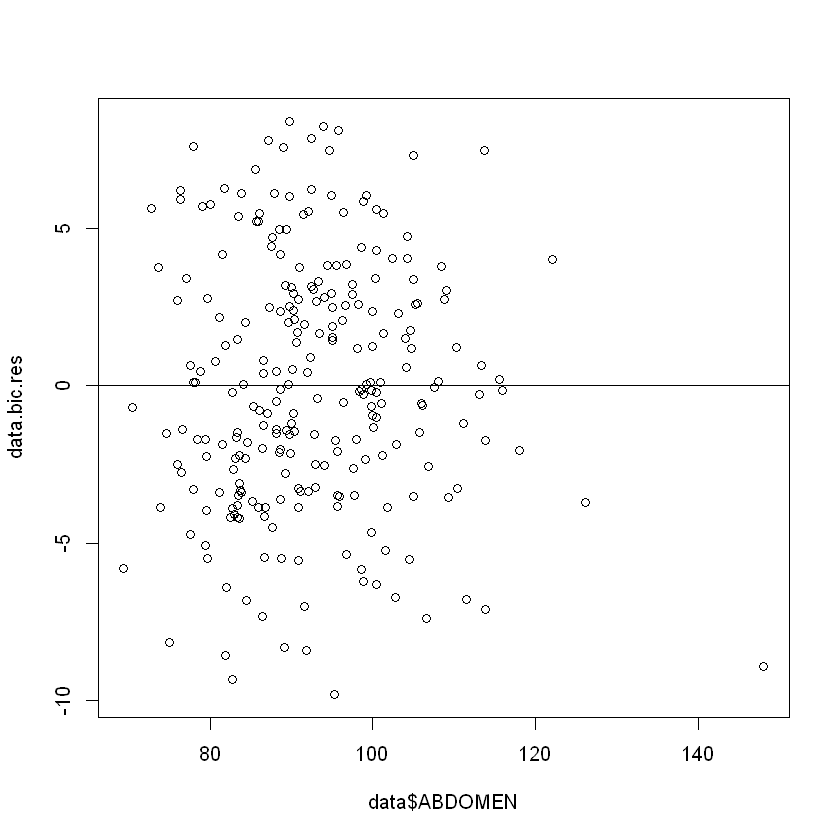

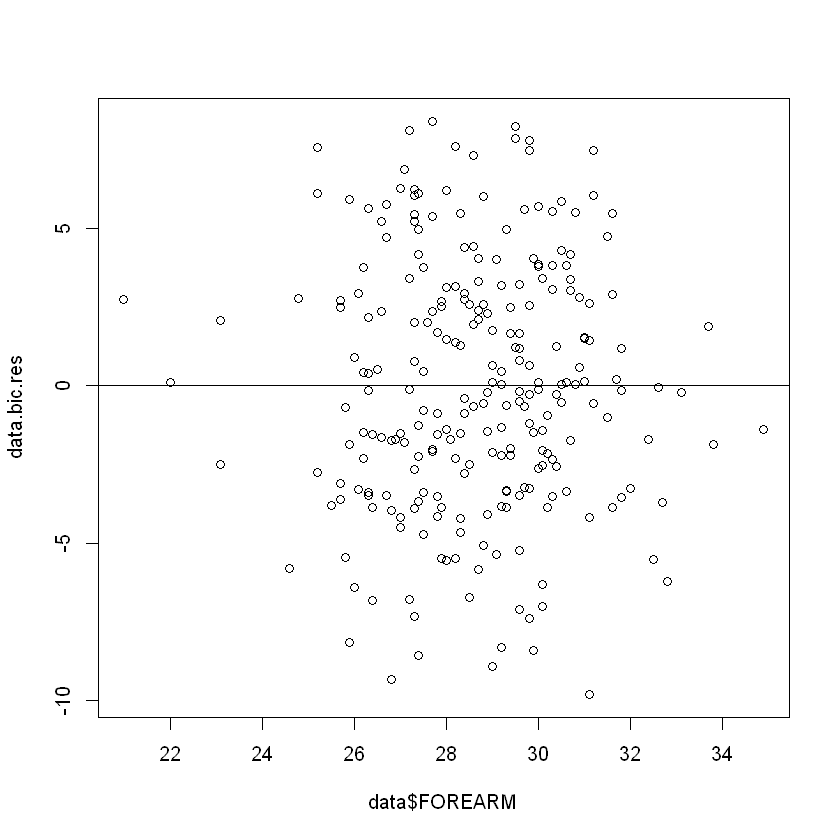

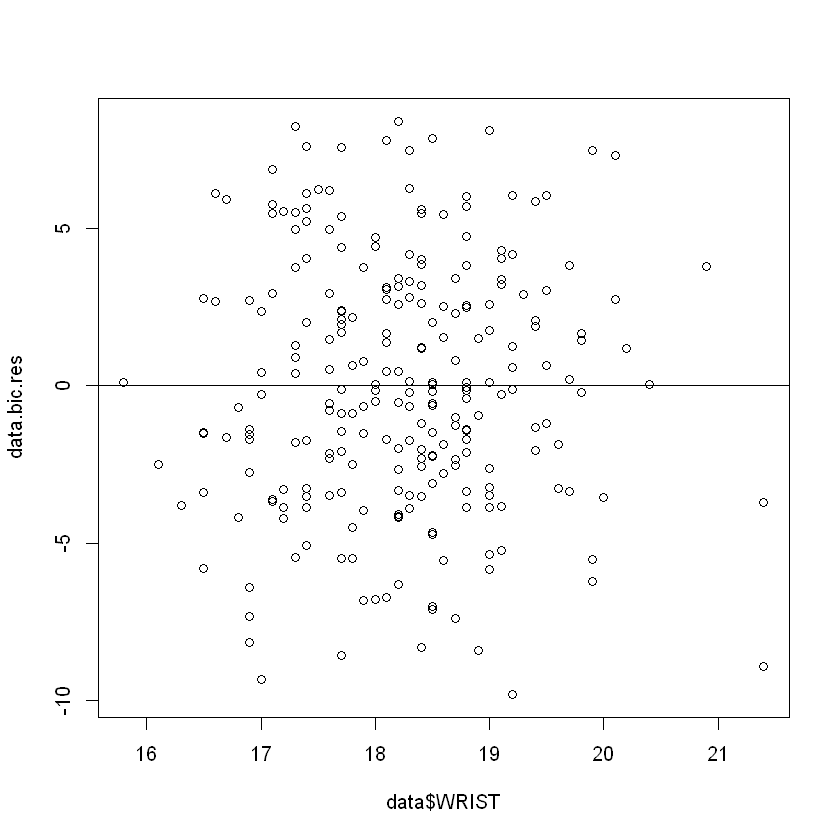

In [4]:
data.bic.res <- residuals(data.bic)
data.bic.fit <- fitted(data.bic)
qqnorm(data.bic.res)
qqline(data.bic.res)
plot(data.bic.fit,data.bic.res);abline(h=0)
plot(data$WEIGHT,data.bic.res);abline(h=0)
plot(data$ABDOMEN,data.bic.res);abline(h=0)
plot(data$FOREARM ,data.bic.res);abline(h=0)
plot(data$WRIST ,data.bic.res);abline(h=0)

In [15]:
library(car)
vif(data.bic)
# From the result we can see that the VIF of all variables are greater than 1, which means there is multicollinearity in the predictors. 
# However, no VIF is larger than 10, which means multicollinearity may not have a large impact on the inference.

WEIGHT  ABDOMEN  FOREARM    WRIST 
7.040774 4.864380 1.793374 2.273047

[1] "coef"   "scales" "Inter"  "lambda" "ym"     "xm"     "GCV"    "kHKB"  
[9] "kLW"

[1] 1

AGE      WEIGHT      HEIGHT   ADIPOSITY        NECK       CHEST 
 0.79421544 -2.07583817 -0.21158347  0.35217883 -1.08728736 -0.16453590 
    ABDOMEN         HIP       THIGH        KNEE       ANKLE      BICEPS 
 8.96193697 -1.35578496  1.16016649 -0.02042697  0.22860618  0.40163205 
    FOREARM       WRIST 
 0.84650597 -1.40854462


Call:
linearRidge(formula = BODYFAT ~ ., data = data)


Coefficients:
             Estimate Scaled estimate Std. Error (scaled) t value (scaled)
(Intercept)  -9.11623              NA                  NA               NA
AGE           0.09094        18.15658             4.97375            3.650
WEIGHT       -0.02850       -13.27058             9.24098            1.436
HEIGHT       -0.08605        -4.99368             4.72551            1.057
ADIPOSITY     0.24970        14.43193             9.08382            1.589
NECK         -0.41527       -15.99334             6.93282            2.307
CHEST         0.05144         6.87048             8.33050            0.825
ABDOMEN       0.58939       100.68954             8.80412           11.437
HIP          -0.08956       -10.16519             8.74929            1.162
THIGH         0.18227        15.16031             8.11789            1.868
KNEE         -0.02185        -0.83473             7.01695            0.119
ANKLE         0.02314        

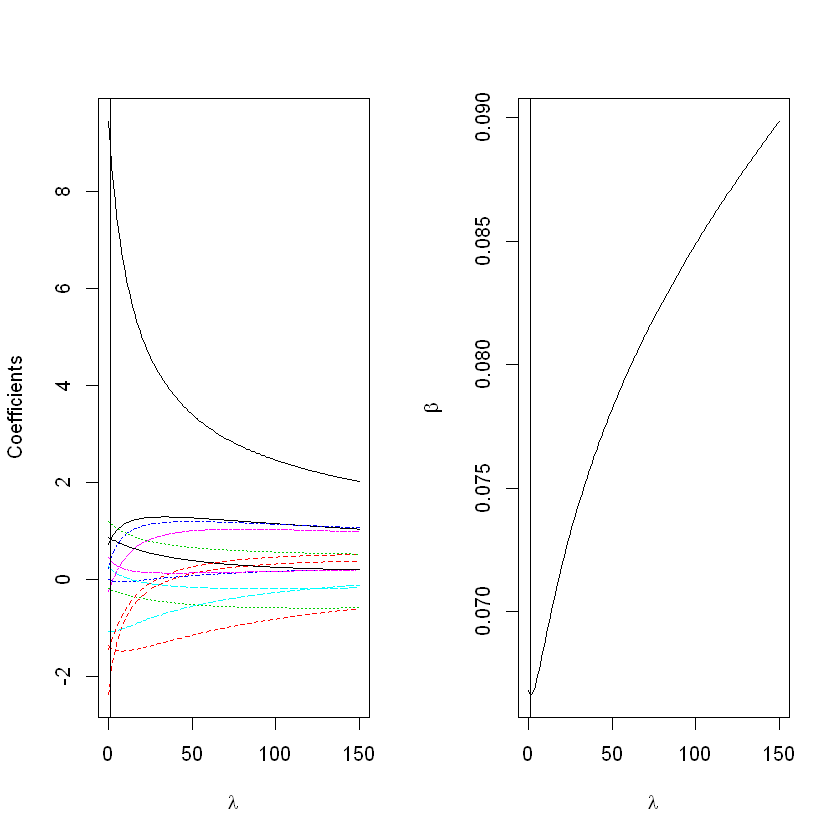

In [24]:
# ridge regression
library(MASS)
ridge.lma<-lm.ridge(BODYFAT~.,lambda = seq(0,150,length.out = 151),data = data,model = TRUE) 
names(ridge.lma)
ridge.lma$lambda[which.min(ridge.lma$GCV)]
ridge.lma$coef[,which.min(ridge.lma$GCV)]
par(mfrow=c(1,2))
#缁樺埗鍥炲綊绯绘暟鍏充簬位鐨勫浘褰紝骞朵綔鍑篏CV鍙栧彇鏈€灏忓€肩殑閭ｆ潯绔栫嚎銆?
matplot(ridge.lma$lambda,t(ridge.lma$coef),xlab = expression(lambda),ylab = "Coefficients",type = "l",lty = 1:20)
abline(v=ridge.lma$lambda[which.min(ridge.lma$GCV)])
#缁樺埗GCV鍏充簬位鐨勫浘褰紝骞朵綔鍑篏CV鍙栧彇鏈€灏忓€肩殑閭ｆ潯绔栫嚎銆?
plot(ridge.lma$lambda,ridge.lma$GCV,type = "l",xlab = expression(lambda),ylab = expression(beta))
abline(v=ridge.lma$lambda[which.min(ridge.lma$GCV)])

library(ridge)
modify=linearRidge(BODYFAT~., data = data)
summary(modify)
#Ridge parameter: 0.03973412
# the bestλ(with minimum GCV) is nearly 0 (0.03973412).



Loading required package: foreach

Loaded glmnet 2.0-18




[1] 0.0377339


Call:  glmnet(x = as.matrix(data[, -1]), y = data$BODYFAT, lambda = cv.fit$lambda.min) 

     Df   %Dev  Lambda
[1,] 11 0.7473 0.03773

15 x 1 sparse Matrix of class "dgCMatrix"
                  1
(Intercept) -13.174
AGE           0.054
WEIGHT       -0.062
HEIGHT       -0.085
ADIPOSITY     .    
NECK         -0.395
CHEST         .    
ABDOMEN       0.822
HIP          -0.138
THIGH         0.158
KNEE          .    
ANKLE         0.070
BICEPS        0.105
FOREARM       0.381
WRIST        -1.422

15 x 1 sparse Matrix of class "dgCMatrix"
                  1
(Intercept) -11.810
AGE           0.037
WEIGHT        .    
HEIGHT       -0.145
ADIPOSITY     .    
NECK          .    
CHEST         .    
ABDOMEN       0.588
HIP           .    
THIGH         .    
KNEE          .    
ANKLE         .    
BICEPS        .    
FOREARM       .    
WRIST        -0.834

AGE  HEIGHT ABDOMEN   WRIST 
  1.134   1.215   1.676   1.897

[1] 0.3862181

1
-3.2340073
-2.9307162
6.4564824
-1.8927566
2.1093281
3.5896889
1.9193414
-1.3983624
-5.3266289
0.9891655


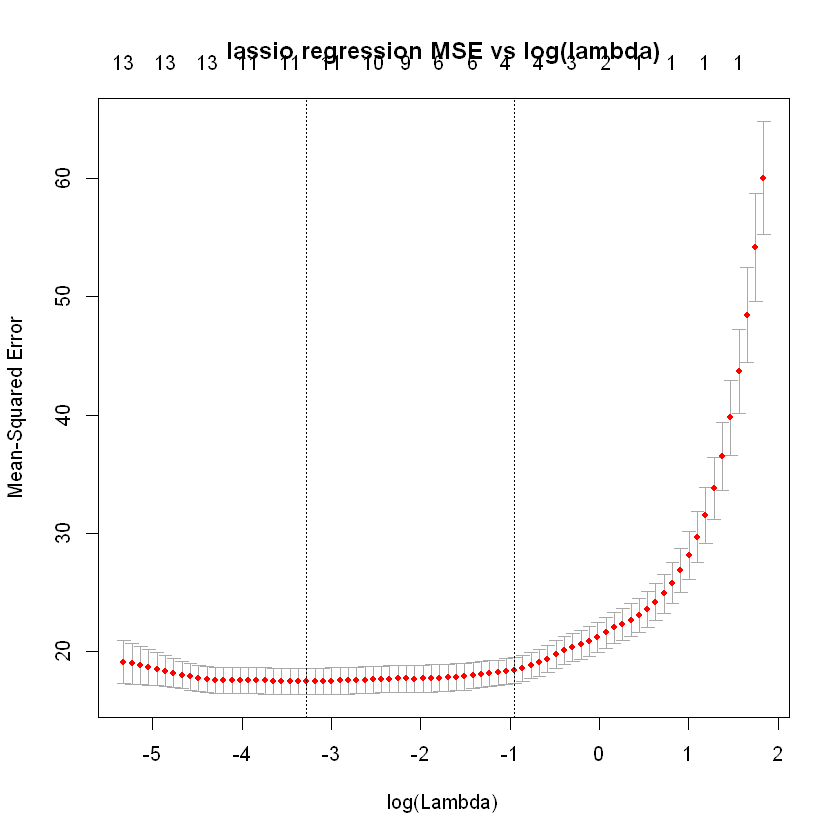

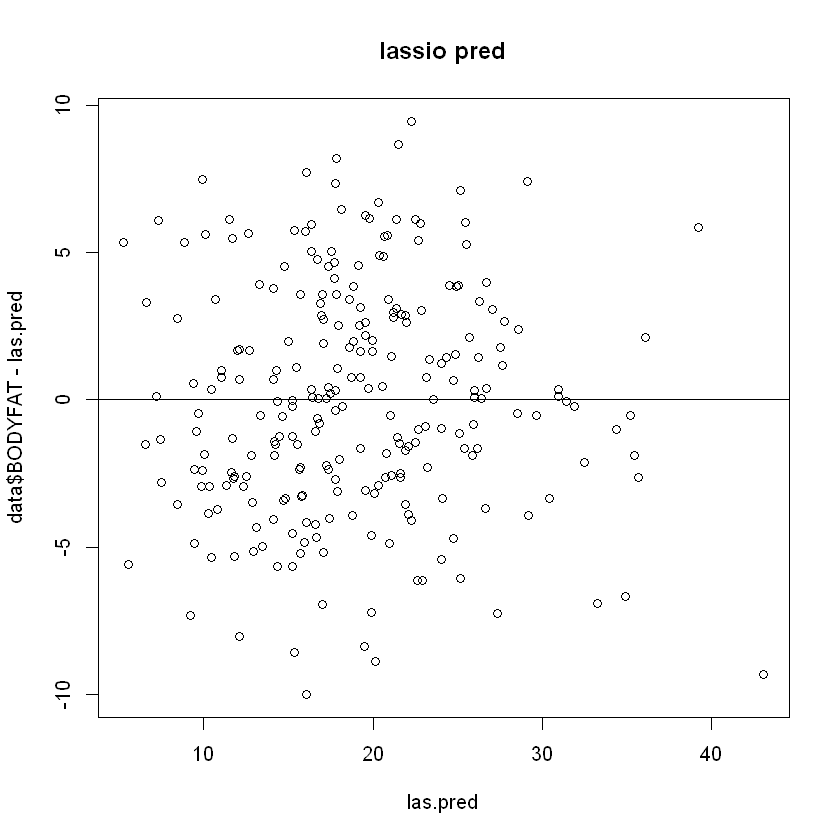

In [27]:

# LASSO
# lassio regression
library("glmnet")
cv.fit=cv.glmnet(as.matrix(data[,-1]),data$BODYFAT)#default 10 folds
plot(cv.fit,main="lassio regression MSE vs log(lambda)")
cv.fit$lambda.min
# cv.fit$lambda.1se
las=glmnet(as.matrix(data[,-1]),data$BODYFAT,lambda = cv.fit$lambda.min)
las
# plot(las, xvar="lambda")
# “lambda.min”: lambda that gives minimum mse. May be too small to select features.
# “lambda.1se”: largest lambda s.t. mse is within 1 sd of minimum. Typically we choose lambda.1se.
round(coef(las,s = "lambda.min"),3)
round(coef(cv.fit, s = "lambda.1se" ),3)
round(vif(lm(BODYFAT~AGE+HEIGHT+ABDOMEN+WRIST,data=data)),3)
cv.fit$lambda.1se
las.pred=predict(las, s ="lambda.1se", newx = as.matrix(data[,-1]))

data$BODYFAT-las.pred
plot(las.pred,data$BODYFAT-las.pred,main="lassio pred");abline(h=0)
las.res=data$BODYFAT-las.pred

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
182,0,40,118.5,68,18.1,33.8,79.3,69.4,85,47.2,33.5,20.2,27.7,24.6,16.5


[1] 252

[1] 251

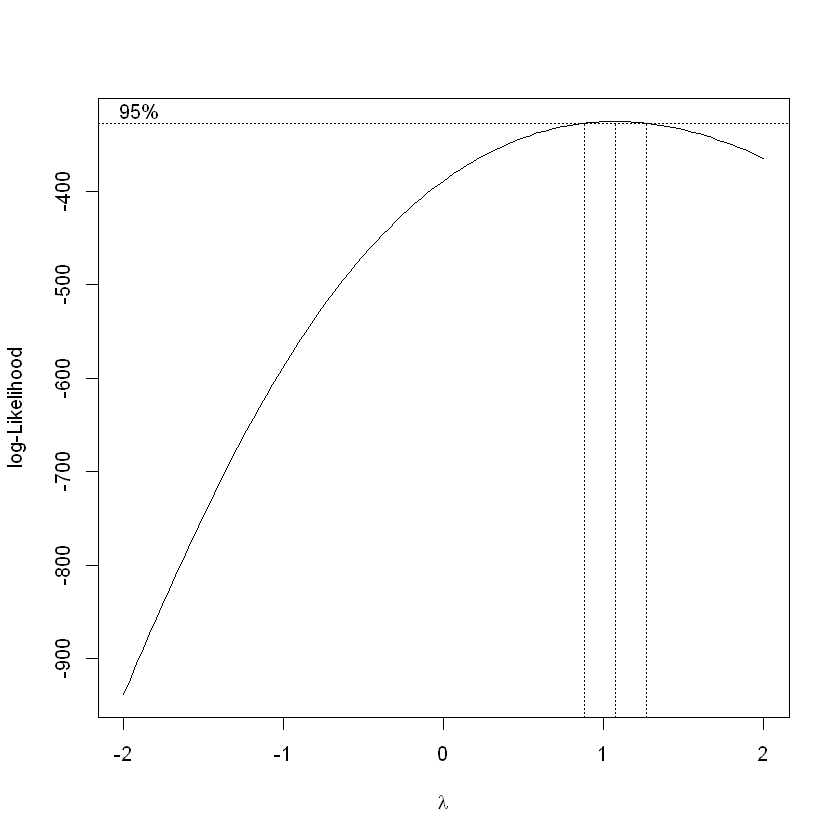

In [31]:

# If we choose data.bic

# transformation
require(MASS)
# boxcox(data.bic)# error contains 0
data[data$BODYFAT==0,]
# the 182 data's bodyfat is 0, which is an error(outlier).remove it.
data0=data
nrow(data)
data=data[-182,]
nrow(data)
boxcox(data.bic)
# lambda near 1, don't do transformation




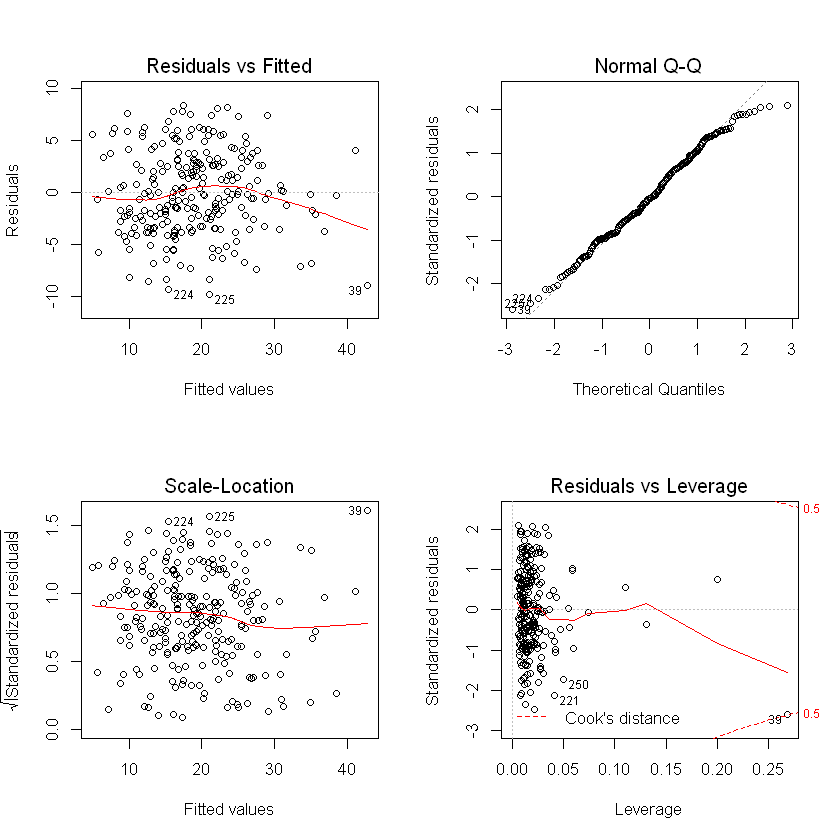

integer(0)

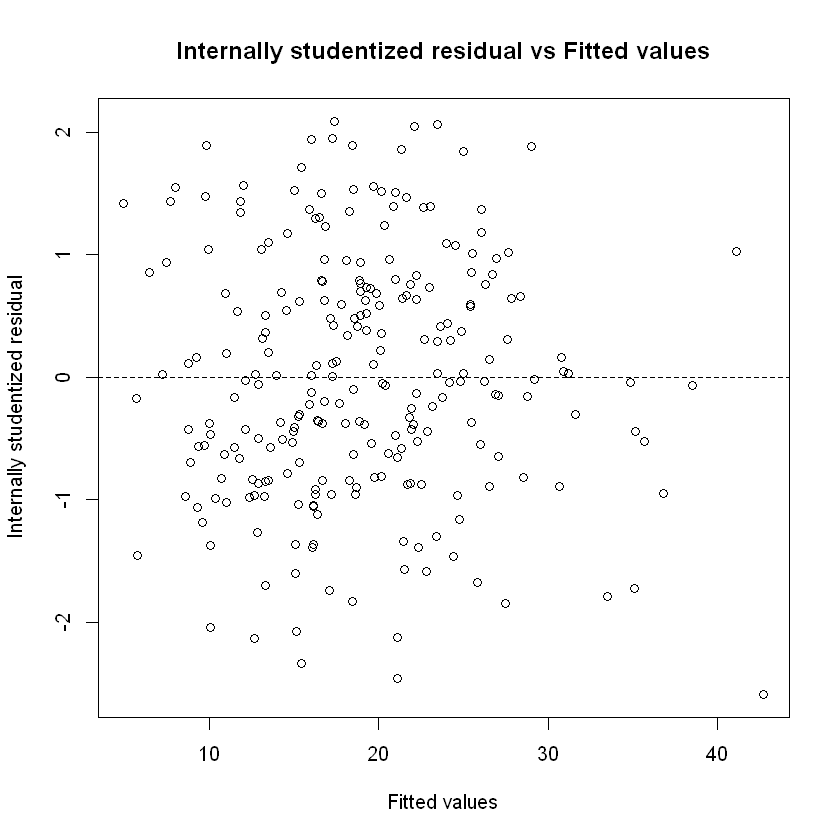

integer(0)

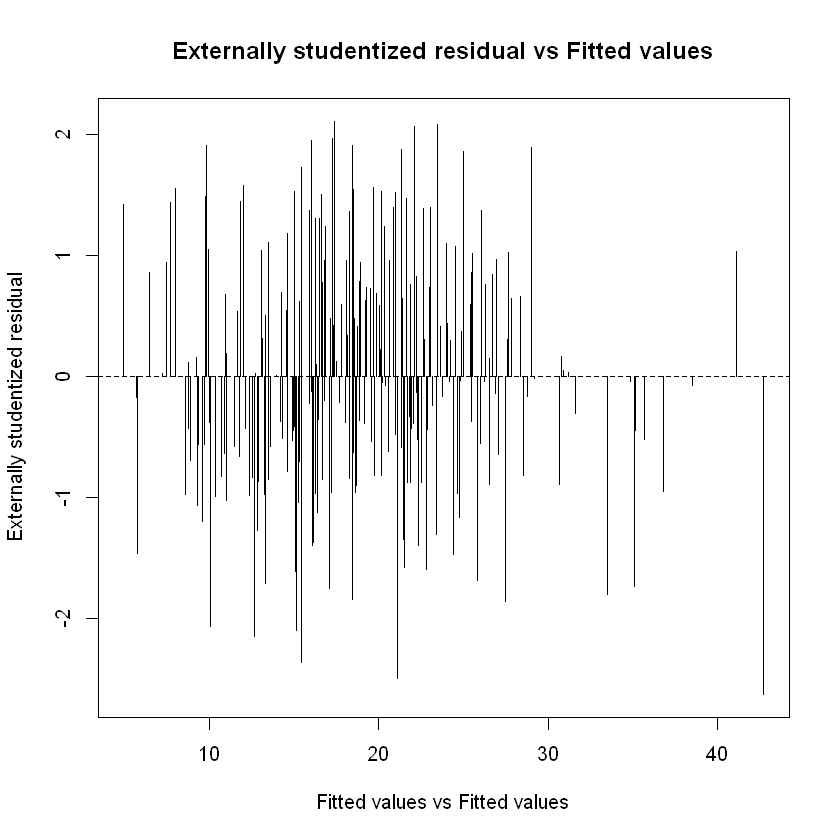

In [34]:


##  plot for standard / studentized res. vs fitted value
par(mfrow=c(2,2))
library(MASS)
lm.reg=data.bic
plot(lm.reg)
index=1:nrow(data)
par(mfrow=c(1,1))
plot(lm.reg$fitted, stdres(lm.reg), xlab="Fitted values",
     ylab="Internally studentized residual",main="Internally studentized residual vs Fitted values") ;abline(h=0, lty=2)
# text(lm.reg$fitted[abs(stdres(lm.reg))>5], labels=index[abs(stdres(lm.reg))>5], cex=1, pos=2)
index[abs(stdres(lm.reg))>5]


plot(lm.reg$fitted, studres(lm.reg), type = "h", xlab="Fitted values vs Fitted values",
     ylab="Externally studentized residual",main="Externally studentized residual vs Fitted values");abline(h=c(0,-3,3), lty=2)
# text(lm.reg$fitted[abs(studres(lm.reg))>5], studres(lm.reg)[abs(studres(lm.reg))>5], labels=index[abs(studres(lm.reg))>5], cex=1, pos=2)
index[abs(studres(lm.reg))>5]
#



[1]  39 175 159 206

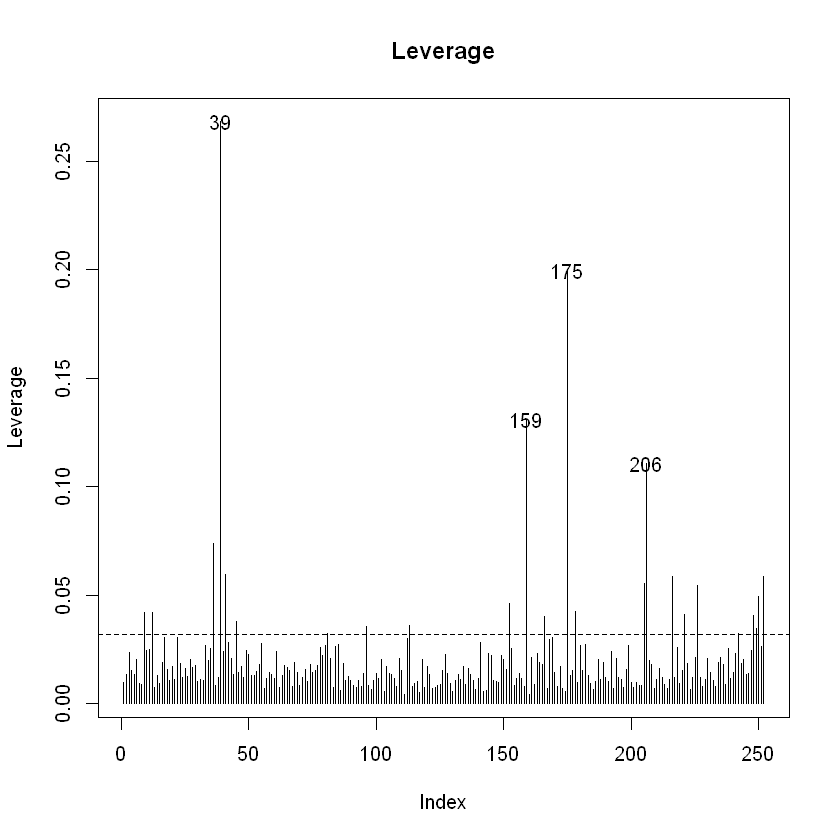

In [35]:

## leverage 
lm.reg.hats = hatvalues(lm.reg)
plot(lm.reg.hats, type = "h", ylab = "Leverage",main="Leverage") 
id_show=order(lm.reg.hats,decreasing=T)[1:4]# the number of outlier can be adjusted
text(id_show,lm.reg.hats[id_show], labels = index[id_show], cex = 1) 
p=length(lm.reg$coefficients)-1;n=nrow(data)
abline(h=2*p/n,lty=2)
# abline(h=2*4/19, lty = 2) # h=2 times p / n =2 times 4 / 19
order(lm.reg.hats,decreasing=T)[1:4]
#39 175 159 206




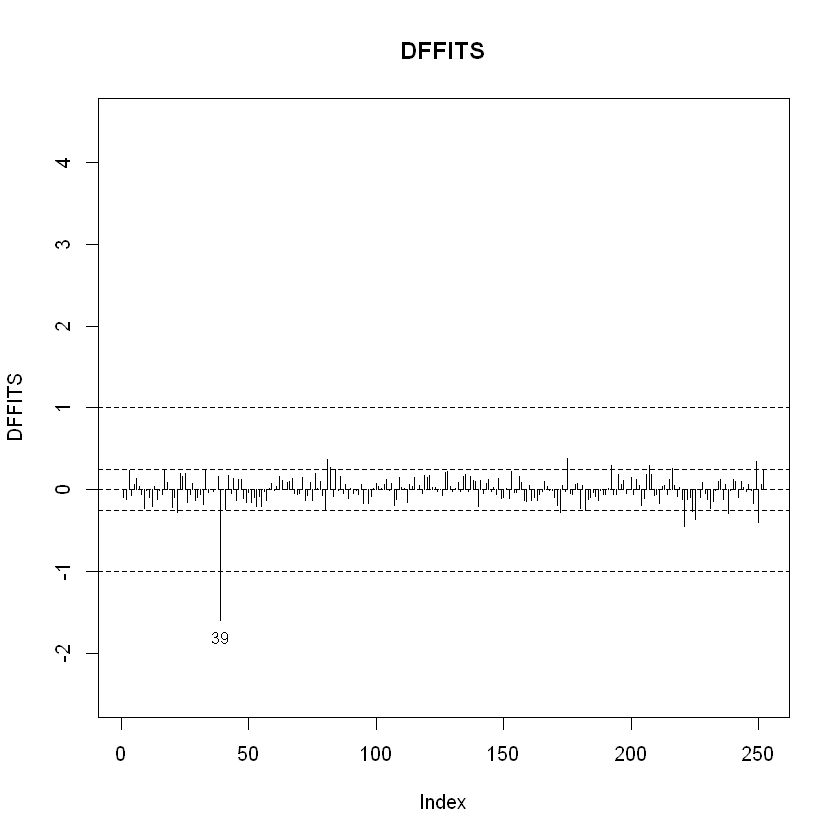

In [38]:
## DFFITS
lm.reg.dffits = dffits(lm.reg)
plot(lm.reg.dffits, type = "h", ylab = "DFFITS", ylim = c(-2.5,4.5),main="DFFITS") 
h=2*sqrt(p/n)
text(which(abs(lm.reg.dffits)>max(1,h)),lm.reg.dffits[abs(lm.reg.dffits)>max(1,h)], labels = index[abs(lm.reg.dffits)>max(1,h)], cex = 0.8, pos = 1)
abline(h = c(-1,-2*sqrt(p/n), 0, 2*sqrt(p/n), 1), lty = 2) # specify your own h 
#39



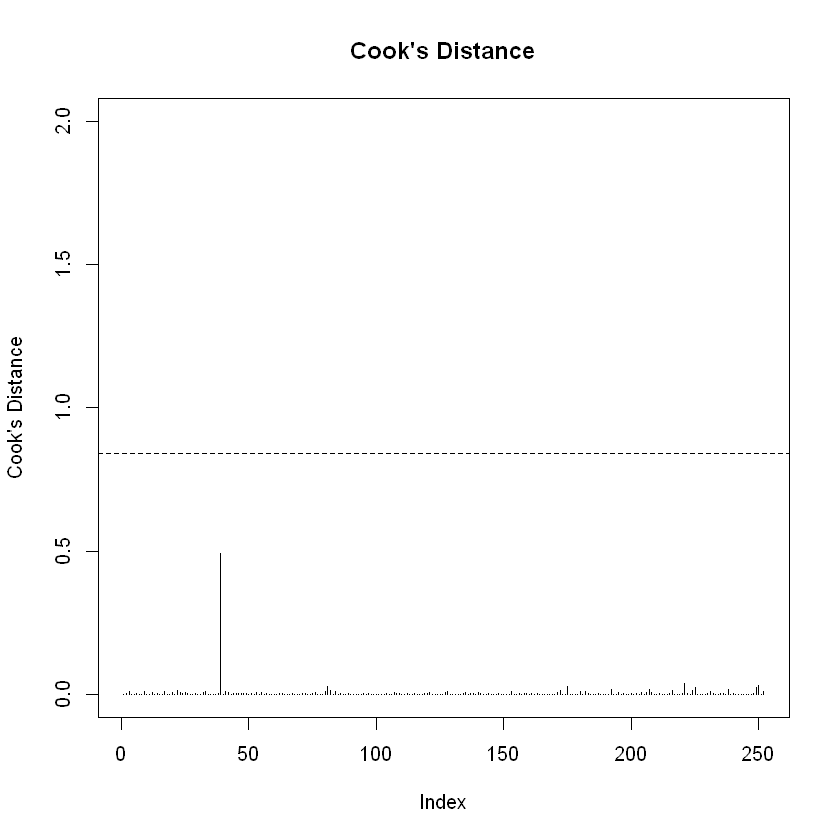

In [37]:

## cook's distance
lm.reg.cooksD = cooks.distance(lm.reg)
plot(lm.reg.cooksD, type = "h", ylab="Cook's Distance",ylim=c(0,2),main="Cook's Distance") 
h=qf(0.50,p,n-p)
# text(which(lm.reg.cooksD>h),lm.reg.cooksD[lm.reg.cooksD>h]-0.5, labels = index[lm.reg.cooksD>h], cex = 1)
# no influential outliers according to cook's distance here
abline(h=qf(0.50,p,n-p), lty=2) #check whether D_i > f_0.5,p,n-p

[1]  39 221 225

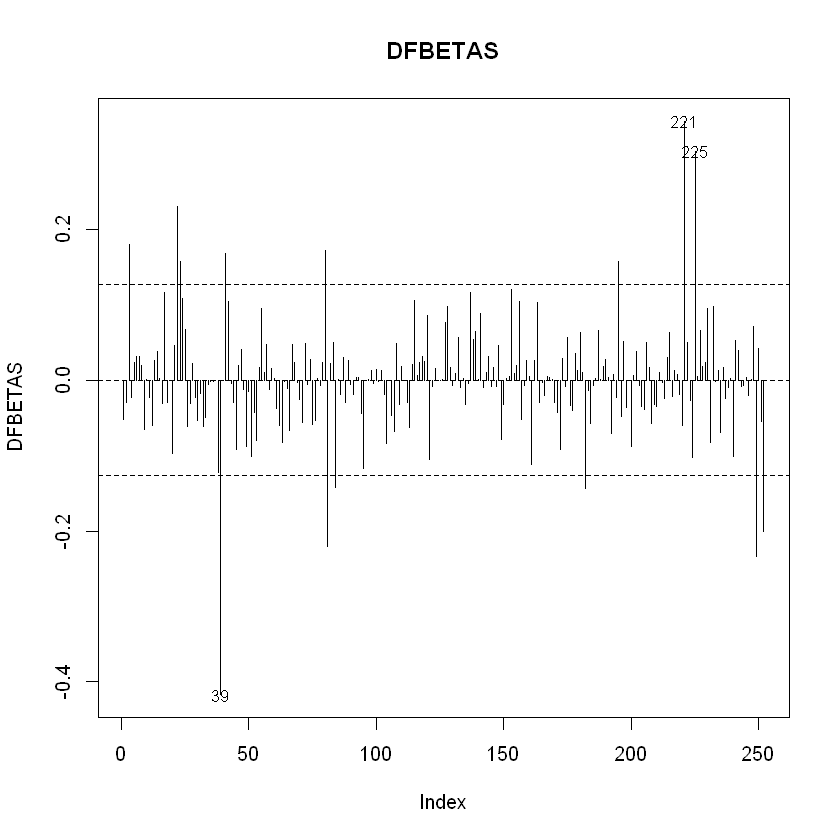

In [39]:
## dfbetas
lm.reg.dfbetas = dfbetas(lm.reg)
plot(lm.reg.dfbetas[,1], type = "h", ylab = "DFBETAS", xlab = "Index", main = "DFBETAS") 
id_show=order(abs(lm.reg.dfbetas[,1]),decreasing = T)[1:3]#the number can be adjusted
text(id_show,lm.reg.dfbetas[,1][id_show], labels = index[id_show], cex = 0.8)
abline(h=c(-1, -2/sqrt(n), 0, 2/sqrt(n), 1), lty = 2) # specify your own threshold
id_show
#39 221 225 249  22



In [40]:

# choose the outlier which?
id_rm=c(39, 175, 159, 206,221, 225)#can be adjusted
data00=data
data=data[-id_rm,]
dim(data)

[1] 245  15